## The Rise of Online Dating

How Couples Meet and Stay Together 2017 (HCMST2017) is a survey carried out by Stanford University, featuring a fresh set of 3,510 survey respondents. The dataset charts a significant shift in the way couples meet each other over time. 

Couples used to meet in real life, through family, church, school, etc., but but now more and more people are “matching” online. As we'll see below, the number of couples meeting online has increased exponentially since the late 1990s. Nowadays, you’re much more likely to meet your next partner online rather than through any other social channel. Meeting through friends or at bars & restaurants remains popular.

In [79]:
import pandas as pd
from datetime import datetime

import plotly.offline as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import cufflinks as cf
cf.set_config_file(offline=True)
from plotly import tools
import plotly.tools as tls

data = pd.io.stata.read_stata('HCMST 2017 fresh sample for public sharing draft v1.1.dta')
data.to_csv('my_stata_file.csv')
df = pd.read_csv('my_stata_file.csv', low_memory=False)

### How Couples Meet

- Family and Friends were the most popular social channels to meet one's other half up until the turn of the century. 
- Since then, online dating has taken over and, in 2017, nearly 40% of respondents met their partner online.

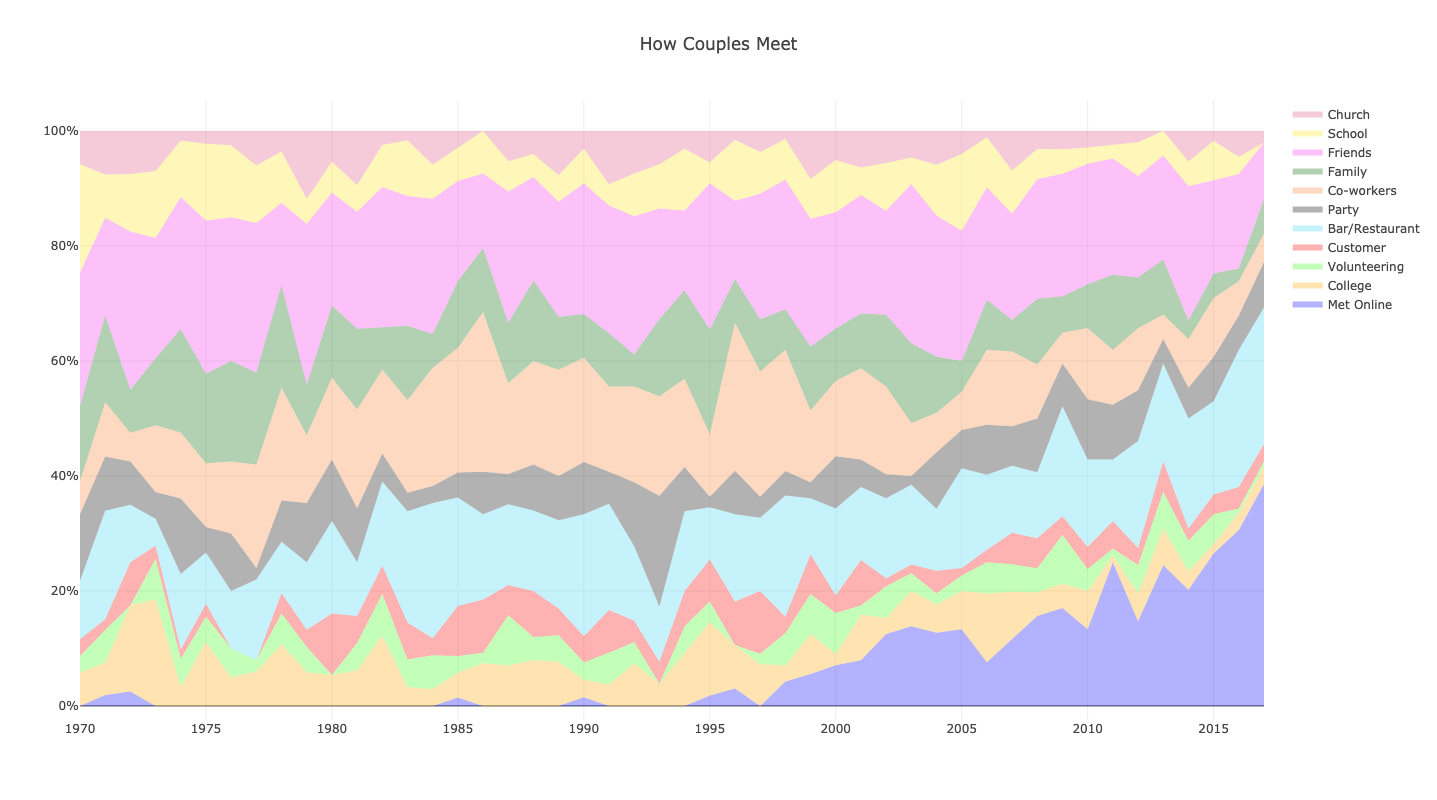

In [109]:
df = df.replace({'no': 0, 'yes': 1})
x = df.groupby('Q21A_Year')['hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
                                  'hcm2017q24_met_as_through_cowork',
                                  'hcm2017q24_met_online', 'hcm2017q24_church',
                                  'hcm2017q24_college', 'hcm2017q24_vol_org', 'hcm2017q24_school',
                                  'hcm2017q24_customer', 'hcm2017q24_bar_restaurant', 'hcm2017q24_party'].sum().fillna('')
x.columns = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']

layout = cf.Layout(
    height=800,
    width=800,
    title='How Couples Meet',
    yaxis=dict(ticksuffix="%")
)
cols = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']
x[cols] = x[cols].div(x[cols].sum(axis=1), axis=0).multiply(100)
x = x.divide(x.sum(axis=1), axis=0)
x[['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']] *= 100

colors = ['#0000FF', '#ffa500', '#39FF14', '#ff0000', '#42d4f4', '#000000', '#f58231', '#006400', '#f032e6', '#ffe119', '#dd5182']
x = x[['Met Online', 'College', 'Volunteering', 'Customer', 'Bar/Restaurant', 'Party', 'Co-workers', 'Family', 'Friends', 'School', 'Church']]
x.iloc[24:].iplot(kind='area',mode= 'none', fill=True,theme='white', hoverinfo='text',layout=layout, color=colors)

### Political Affiliations

Respondents were asked about their political leanings & given the following seven options:

1. Strong Republican
2. Not Strong Republican
3. Leans Republican
4. Undecided/Independent/Other
5. Leans Democrat
6. Not Strong Democrat
7. Strong Democrat

Let's see if the daing habits differ between right and left.

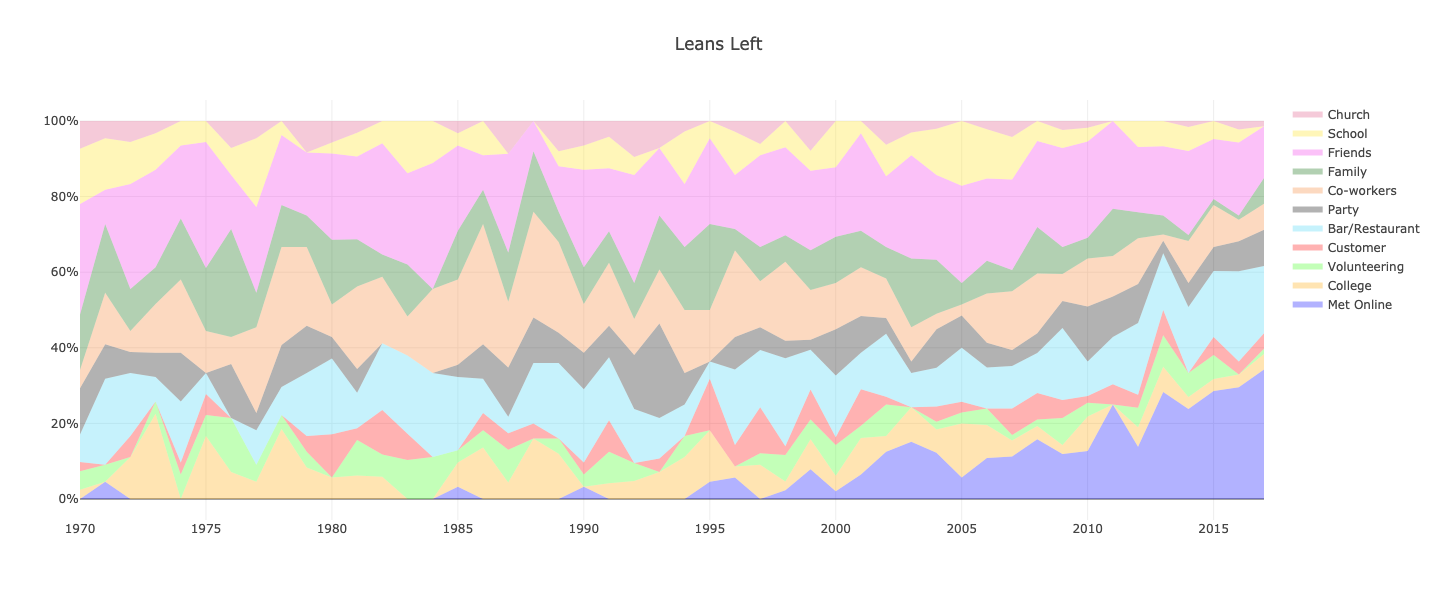

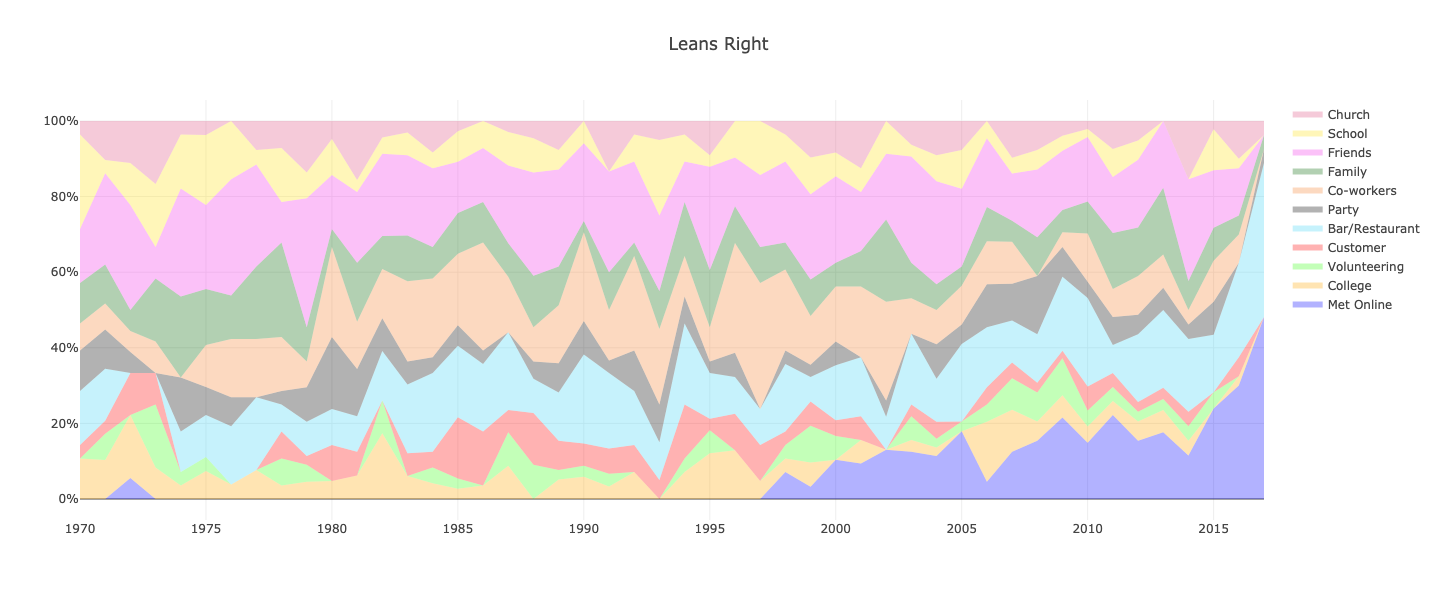

In [75]:
dem = df[(df['partyid7'] == 'Leans Democrat') | (df['partyid7'] == 'Not Strong Democrat') | (df['partyid7'] == 'Strong Democrat')]
rep = df[(df['partyid7'] == 'Strong Republican') | (df['partyid7'] == 'Not Strong Republican') | (df['partyid7'] == 'Leans Republican')]

dem = dem.groupby('Q21A_Year')['hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
                                  'hcm2017q24_met_as_through_cowork',
                                  'hcm2017q24_met_online', 'hcm2017q24_church',
                                  'hcm2017q24_college', 'hcm2017q24_vol_org', 'hcm2017q24_school',
                                  'hcm2017q24_customer', 'hcm2017q24_bar_restaurant', 'hcm2017q24_party'].sum().fillna('')
rep = rep.groupby('Q21A_Year')['hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
                                  'hcm2017q24_met_as_through_cowork',
                                  'hcm2017q24_met_online', 'hcm2017q24_church',
                                  'hcm2017q24_college', 'hcm2017q24_vol_org', 'hcm2017q24_school',
                                  'hcm2017q24_customer', 'hcm2017q24_bar_restaurant', 'hcm2017q24_party'].sum().fillna('')

dem.columns = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering','School', 'Customer', 'Bar/Restaurant', 'Party']
rep.columns = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering','School', 'Customer', 'Bar/Restaurant', 'Party']

cols = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']
dem[cols] = dem[cols].div(dem[cols].sum(axis=1), axis=0).multiply(100)
rep[cols] = rep[cols].div(rep[cols].sum(axis=1), axis=0).multiply(100)

dem = dem.divide(x.sum(axis=1), axis=0)
rep = rep.divide(x.sum(axis=1), axis=0)
dem[['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']] *= 100
rep[['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']] *= 100

dem = dem[['Met Online', 'College', 'Volunteering', 'Customer', 'Bar/Restaurant', 'Party', 'Co-workers', 'Family', 'Friends', 'School', 'Church']]
rep = rep[['Met Online', 'College', 'Volunteering', 'Customer', 'Bar/Restaurant', 'Party', 'Co-workers', 'Family', 'Friends', 'School', 'Church']]

def make_plot(df, title):
    layout = cf.Layout(
    height=600,
    width=800,
    title=title,
    yaxis=dict(ticksuffix="%")
)
    df.iloc[24:].iplot(kind='area',mode= 'none', fill=True,theme='white', hoverinfo='text',layout=layout, color=colors)
    
make_plot(dem, 'Leans Left')
make_plot(rep, 'Leans Right')

- There have benn no major noticeable differences in dating patterns between those identifying Republican or Democrat.
- The increase in online dating among those identifying as *right-leaning* has been greater.

### Political Affiliation

Survey respondents were also asked about how frequently they have sex.

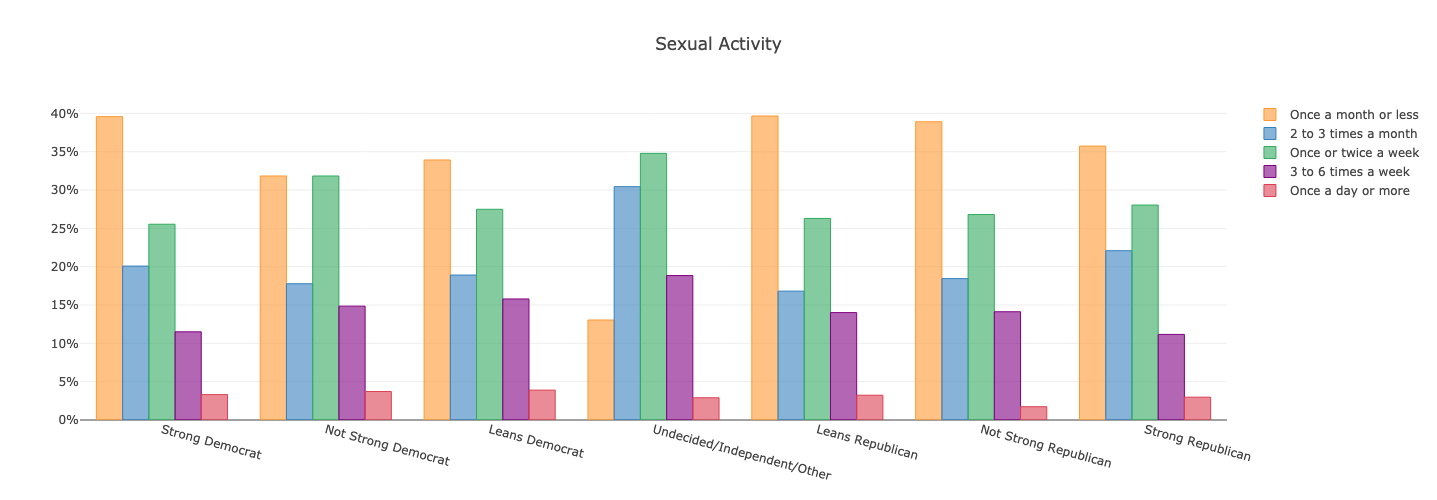

In [111]:
dem = df[(df['partyid7'] == 'Leans Democrat') | (df['partyid7'] == 'Not Strong Democrat') | (df['partyid7'] == 'Strong Democrat')]
rep = df[(df['partyid7'] == 'Strong Republican') | (df['partyid7'] == 'Not Strong Republican') | (df['partyid7'] == 'Leans Republican')]
other = df[(df['partyid7'] == 'Undecided/Independent/Other')]

freq = pd.DataFrame(df.groupby(['partyid7', 'w6_sex_frequency'])['w6_sex_frequency'].count())

freq = freq.reindex(['Strong Democrat', 'Not Strong Democrat', 'Leans Democrat', 'Undecided/Independent/Other',
             'Leans Republican', 'Not Strong Republican', 'Strong Republican'], level=0)
freq = freq.reindex(['Once a month or less', '2 to 3 times a month', 'Once or twice a week', '3 to 6 times a week',
             'Once a day or more'], level=1)

freq = freq.unstack(level=1)
freq.columns = freq.columns.get_level_values(0)
freq.columns = ['Once a month or less', '2 to 3 times a month', 'Once or twice a week', '3 to 6 times a week', 'Once a day or more']
cols = ['2 to 3 times a month', '3 to 6 times a week', 'Once a day or more', 'Once a month or less', 'Once or twice a week']
freq[cols] = freq[cols].div(freq[cols].sum(axis=1), axis=0).multiply(100)
freq = freq[['Once a month or less', '2 to 3 times a month', 'Once or twice a week', '3 to 6 times a week', 'Once a day or more']]

layout = cf.Layout(
    height=500,
    width=900,
    title='Sexual Activity',
    showlegend=True,
    xaxis=dict(tickangle=15),
    yaxis=dict(ticksuffix="%")
)
freq.iplot(kind='bar', layout=layout)

### Sexual Orientation

Respondents were asked about their sexual orientation & given the following six options:

1. Refused
2. heterosexual or straight
3. gay
4. lesbian
5. bisexual
6. Something else

The authors do note that self-identified Lesbian, Gay, and Bisexual respondents were oversampled.

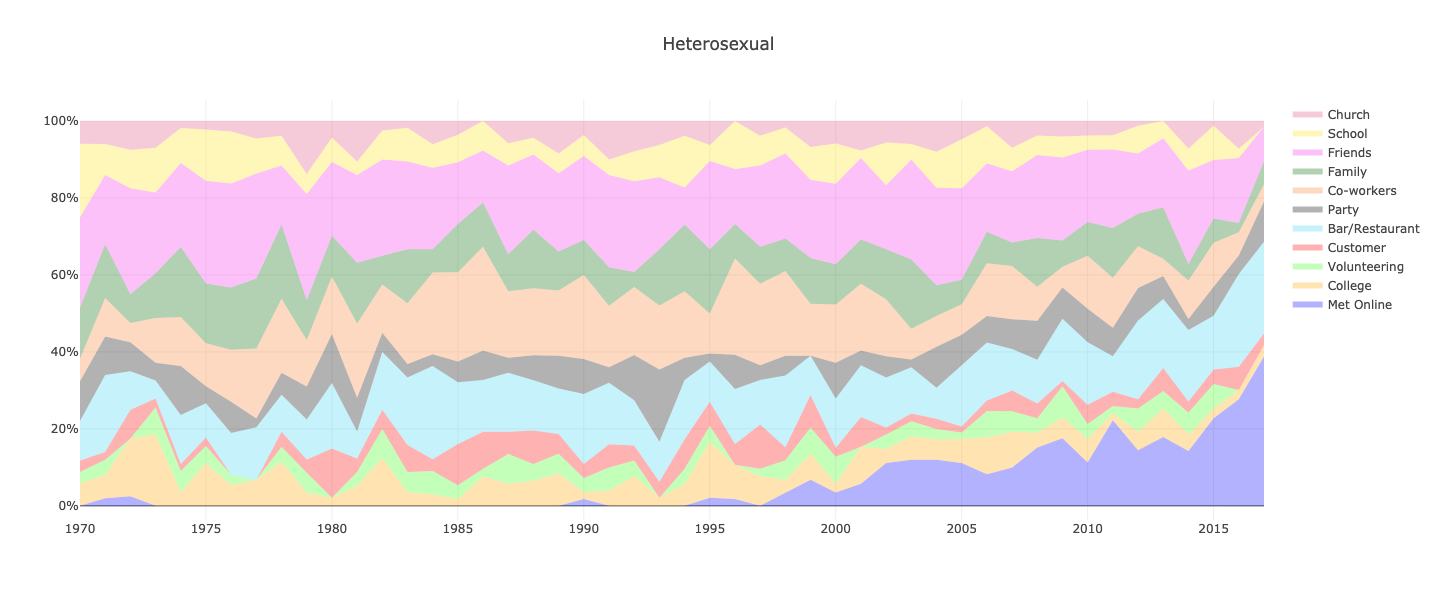

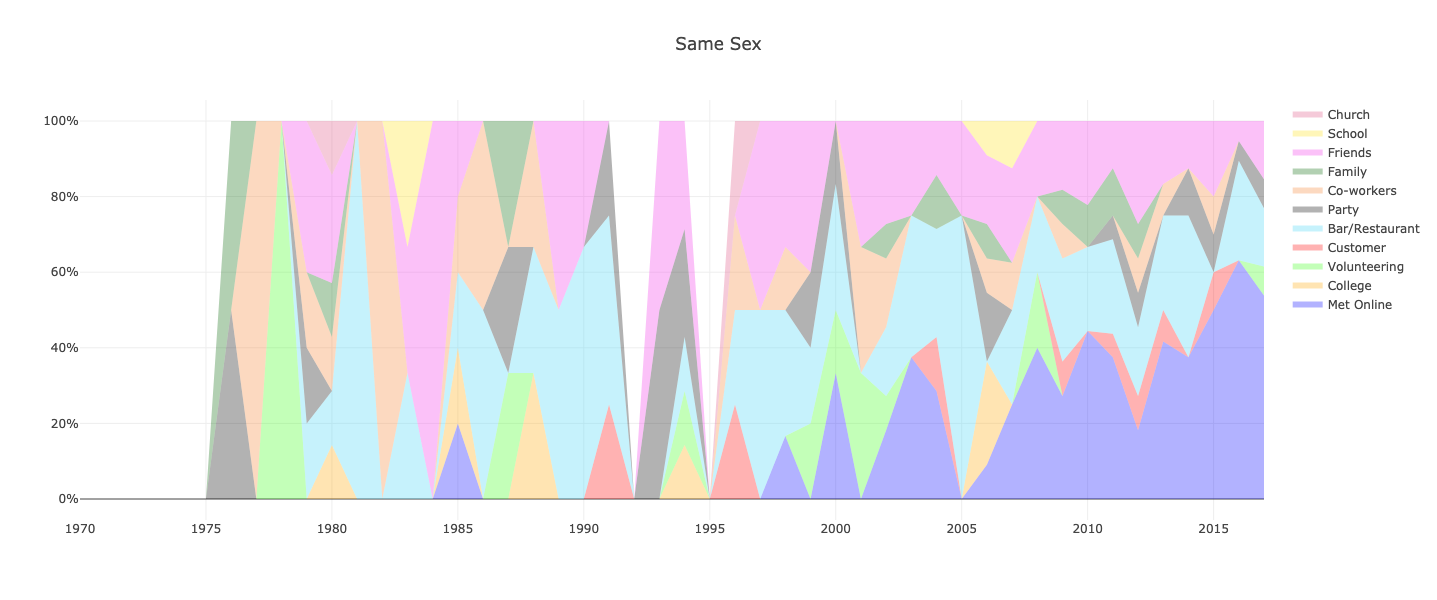

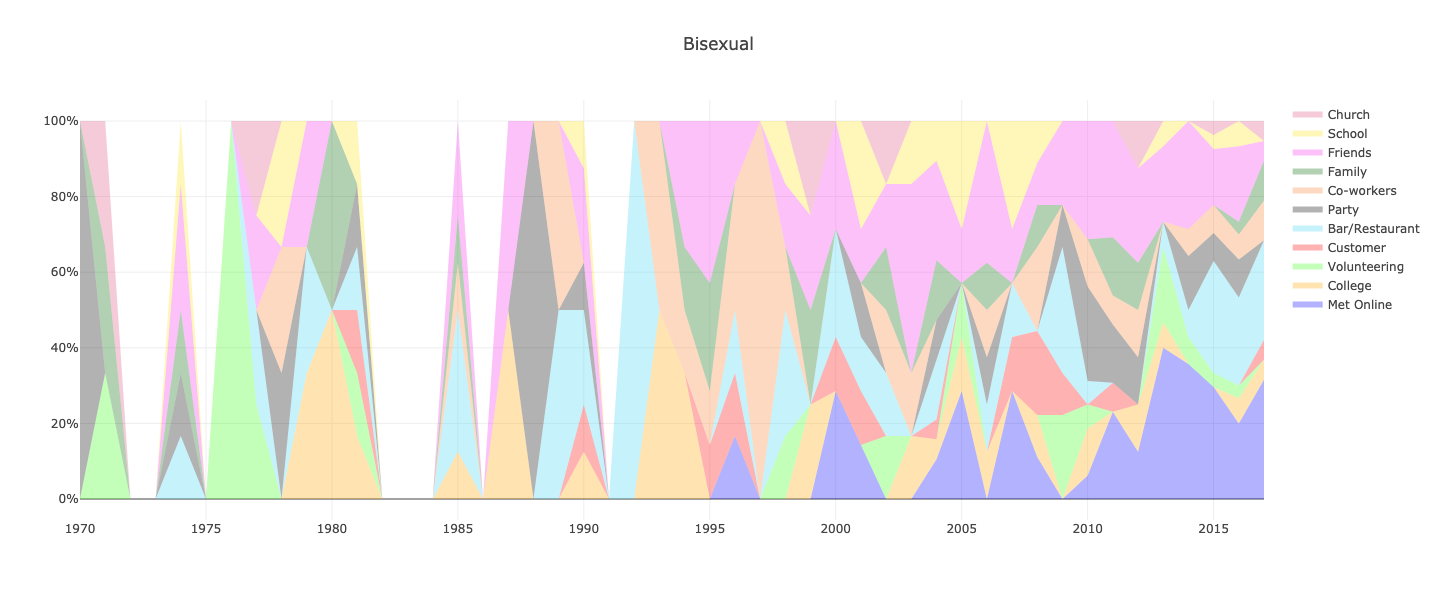

In [76]:
heterosexual = df[(df['w6_identity_all'] == 'heterosexual or straight')]
same_sex = df[(df['w6_identity_all'] == 'gay') | (df['w6_identity_all'] == 'lesbian')]
bisexual = df[(df['w6_identity_all'] == 'bisexual')]

heterosexual = heterosexual.groupby('Q21A_Year')['hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
                                  'hcm2017q24_met_as_through_cowork',
                                  'hcm2017q24_met_online', 'hcm2017q24_church',
                                  'hcm2017q24_college', 'hcm2017q24_vol_org', 'hcm2017q24_school',
                                  'hcm2017q24_customer', 'hcm2017q24_bar_restaurant', 'hcm2017q24_party'].sum().fillna('')
same_sex = same_sex.groupby('Q21A_Year')['hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
                                  'hcm2017q24_met_as_through_cowork',
                                  'hcm2017q24_met_online', 'hcm2017q24_church',
                                  'hcm2017q24_college', 'hcm2017q24_vol_org', 'hcm2017q24_school',
                                  'hcm2017q24_customer', 'hcm2017q24_bar_restaurant', 'hcm2017q24_party'].sum().fillna('')
bisexual = bisexual.groupby('Q21A_Year')['hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
                                  'hcm2017q24_met_as_through_cowork',
                                  'hcm2017q24_met_online', 'hcm2017q24_church',
                                  'hcm2017q24_college', 'hcm2017q24_vol_org', 'hcm2017q24_school',
                                  'hcm2017q24_customer', 'hcm2017q24_bar_restaurant', 'hcm2017q24_party'].sum().fillna('')

heterosexual.columns = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering','School', 'Customer', 'Bar/Restaurant', 'Party']
same_sex.columns = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering','School', 'Customer', 'Bar/Restaurant', 'Party']
bisexual.columns = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering','School', 'Customer', 'Bar/Restaurant', 'Party']

cols = ['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering','School', 'Customer', 'Bar/Restaurant', 'Party']
heterosexual[cols] = heterosexual[cols].div(heterosexual[cols].sum(axis=1), axis=0).multiply(100)
same_sex[cols] = same_sex[cols].div(same_sex[cols].sum(axis=1), axis=0).multiply(100)
bisexual[cols] = bisexual[cols].div(bisexual[cols].sum(axis=1), axis=0).multiply(100)

heterosexual = heterosexual.divide(x.sum(axis=1), axis=0)
same_sex = same_sex.divide(x.sum(axis=1), axis=0)
bisexual = bisexual.divide(x.sum(axis=1), axis=0)
heterosexual[['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']] *= 100
same_sex[['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']] *= 100
bisexual[['Family', 'Friends', 'Co-workers', 'Met Online', 'Church', 'College', 'Volunteering',
            'School', 'Customer', 'Bar/Restaurant', 'Party']] *= 100


heterosexual = heterosexual[['Met Online', 'College', 'Volunteering', 'Customer', 'Bar/Restaurant', 'Party', 'Co-workers', 'Family', 'Friends', 'School', 'Church']]
same_sex = same_sex[['Met Online', 'College', 'Volunteering', 'Customer', 'Bar/Restaurant', 'Party', 'Co-workers', 'Family', 'Friends', 'School', 'Church']]
bisexual = bisexual[['Met Online', 'College', 'Volunteering', 'Customer', 'Bar/Restaurant', 'Party', 'Co-workers', 'Family', 'Friends', 'School', 'Church']]



def make_plot(df, title):
    layout = cf.Layout(
    height=600,
    width=800,
    title=title,
    yaxis=dict(ticksuffix="%")
)
    df.iloc[24:].iplot(kind='area',mode= 'none', fill=True,theme='white', hoverinfo='text',layout=layout, color=colors)
    
make_plot(heterosexual, 'Heterosexual')
make_plot(same_sex, 'Same Sex')
make_plot(bisexual, 'Bisexual')

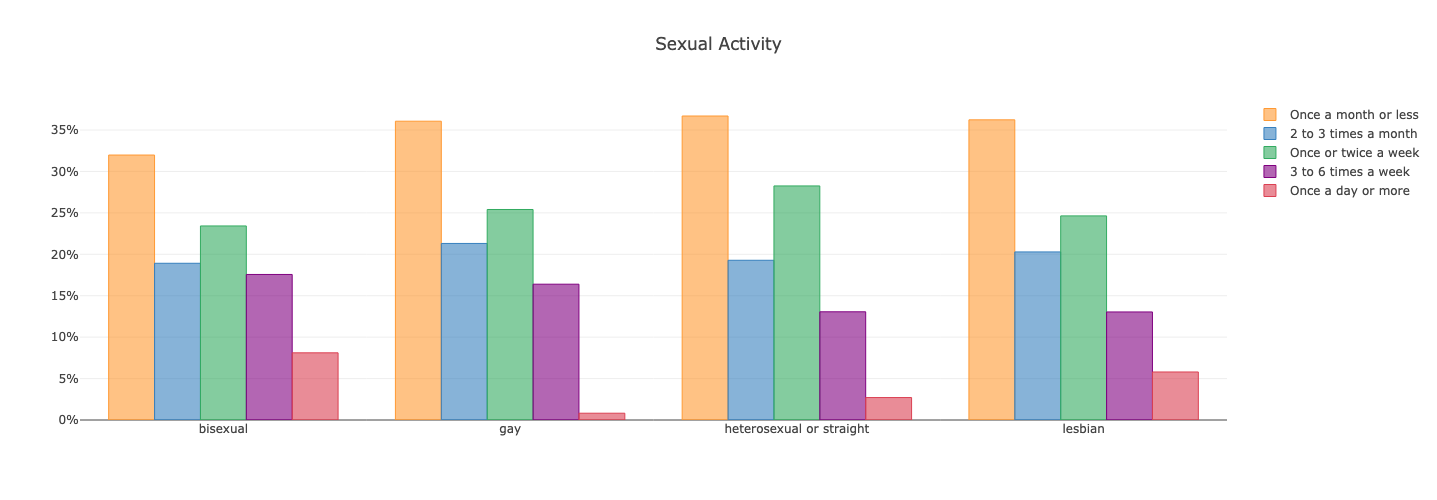

In [112]:
orientation = df[~df['w6_identity_all'].isin(['Refused', 'Something else'])]
freq = pd.DataFrame(orientation.groupby(['w6_identity_all', 'w6_sex_frequency'])['w6_sex_frequency'].count())

freq = freq.unstack(level=1)
freq.columns = freq.columns.get_level_values(0)
freq.columns = ['2 to 3 times a month', '3 to 6 times a week', 'Once a day or more', 'Once a month or less', 'Once or twice a week', 'Refused']
freq = freq.drop('Refused', axis=1)
cols = ['2 to 3 times a month', '3 to 6 times a week', 'Once a day or more', 'Once a month or less', 'Once or twice a week']
freq[cols] = freq[cols].div(freq[cols].sum(axis=1), axis=0).multiply(100)
freq = freq[['Once a month or less', '2 to 3 times a month', 'Once or twice a week', '3 to 6 times a week', 'Once a day or more']]
layout = cf.Layout(
    height=500,
    width=900,
    title='Sexual Activity',
    showlegend=True,
    yaxis=dict(ticksuffix="%")
)
freq.iplot(kind='bar', layout=layout)

Data Source: Rosenfeld, Michael J., Reuben J. Thomas, and Sonia Hausen. 2019 How Couples Meet and Stay Together 2017 fresh sample. Stanford, CA: Stanford University Libraries. 

You can find the dataset and data dictionary [here](https://data.stanford.edu/hcmst2017).